# Apple Quality EDA

## 00. 기본 셋팅

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
# 한글 폰트 설정
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\MALGUNSL.ttf'
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font', family=font_name)
plt.rc('axes', unicode_minus = False)

## 01. 데이터 수집 및 로딩
- CSV, Excel, DB, API 등에서 데이터를 불러오고, DataFrame 생성

In [25]:
df = pd.read_csv('data/apple_quality.csv')
df.head()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good

## 02. 데이터 구조 및 변수 이해
- 데이터 목적 파악, Feature/Target 구분
- 변수 타입 확인 (수치형, 범주형 등)
- 크기, 컬럼명, 샘플 확인

| 컬럼 이름    | 자료형    | 한글 이름    | 타입        | 역할      | 설명                      |
|--------------|-----------|--------------|-------------|-----------|---------------------------|
| A_id         | float64   | 과일 ID      | 수치형      | Feature   | 고유 식별자               |
| Size         | float64   | 크기         | 수치형      | Feature   | 과일의 크기               |
| Weight       | float64   | 무게         | 수치형      | Feature   | 과일의 무게               |
| Sweetness    | float64   | 당도         | 수치형      | Feature   | 과일의 단맛 정도          |
| Crunchiness  | float64   | 아삭함       | 수치형      | Feature   | 과일의 아삭한 정도        |
| Juiciness    | float64   | 과즙 함량    | 수치형      | Feature   | 과일의 즙이 많은 정도     |
| Ripeness     | float64   | 숙성도       | 수치형      | Feature   | 과일의 익은 정도          |
| Acidity      | object    | 산도         | 범주형      | Feature   | 과일의 신맛 정도 (Low, Medium 등) |
| Quality      | object    | 품질         | 범주형      | Target    | 과일의 품질 평가 (Good, Bad 등)   |


In [26]:
print(df.shape)
print(df.dtypes)
print(df.head())
df.head()

(4001, 9)
A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object
   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good  


A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good

## 03. 데이터 요약 및 기술 통계
- describe로 기본 통계량 확인
- 범주형은 value_counts로 분포 확인

In [27]:
print(df.describe())
print(df['Quality'].value_counts())

              A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness  
count  4000.000000  4000.000000  
mean      0.512118     0.498277  
std       1.930286     1.874427  
min      -5.961897    -5.864599  
25%      -0.801286    -0.771677  
50%       0.534219     0.503445  
75%       1.835976     1.766212  
max       7.364403     7.237837  
Quality
good    2004
bad   

## 04. 결측치 및 이상치 탐색
- isnull로 결측치 개수 확인
- boxplot 등으로 이상치 탐지

In [28]:
print(df.isnull().sum())
df.boxplot(figsize=(10, 5))
plt.show()
print(df[df.isnull().any(axis=1)])

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64


MemoryError: bad allocation

<Figure size 1.2e+06x1.2e+06 with 3633 Axes>

      A_id  Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
4000   NaN   NaN     NaN        NaN          NaN        NaN       NaN   

                                Acidity Quality  
4000  Created_by_Nidula_Elgiriyewithana     NaN  


## 05. 변수 분포 시각화
- 히스토그램, 박스플롯 등으로 개별 변수의 분포 확인

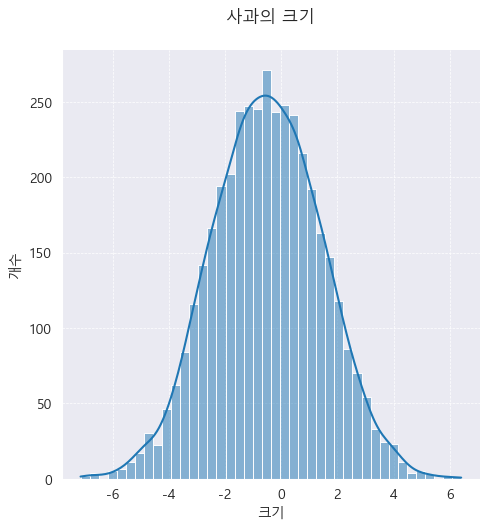

In [29]:
sns.displot (x = 'Size', kde = True, data = df)
plt.title('사과의 크기', pad = 20)
plt.xlabel('크기')
plt.ylabel('개수')
plt.grid(True, linestyle='--', linewidth=0.5, zorder=0)
plt.show()

## 06. 변수 간 관계 시각화
- 산점도, pairplot 등으로 변수 간 상관관계 확인


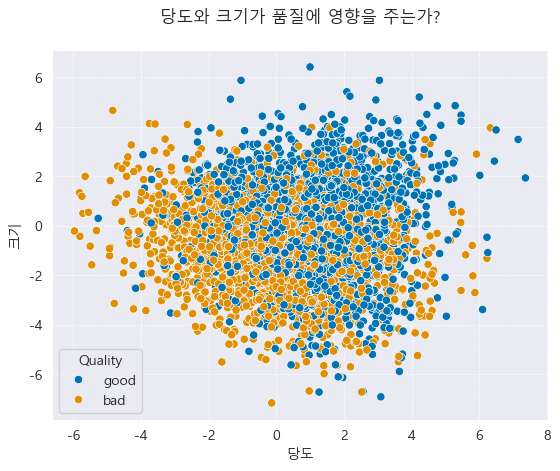

In [30]:
# 크기와 당도, 품질간의 산포도

sns.scatterplot(data = df, x = 'Juiciness', y = 'Size', hue = 'Quality', palette='colorblind')
plt.title('당도와 크기가 품질에 영향을 주는가?', pad=20)
plt.xlabel('당도')
plt.ylabel('크기')
plt.grid(True, linestyle='--', linewidth=0.5, zorder=0)
plt.show()

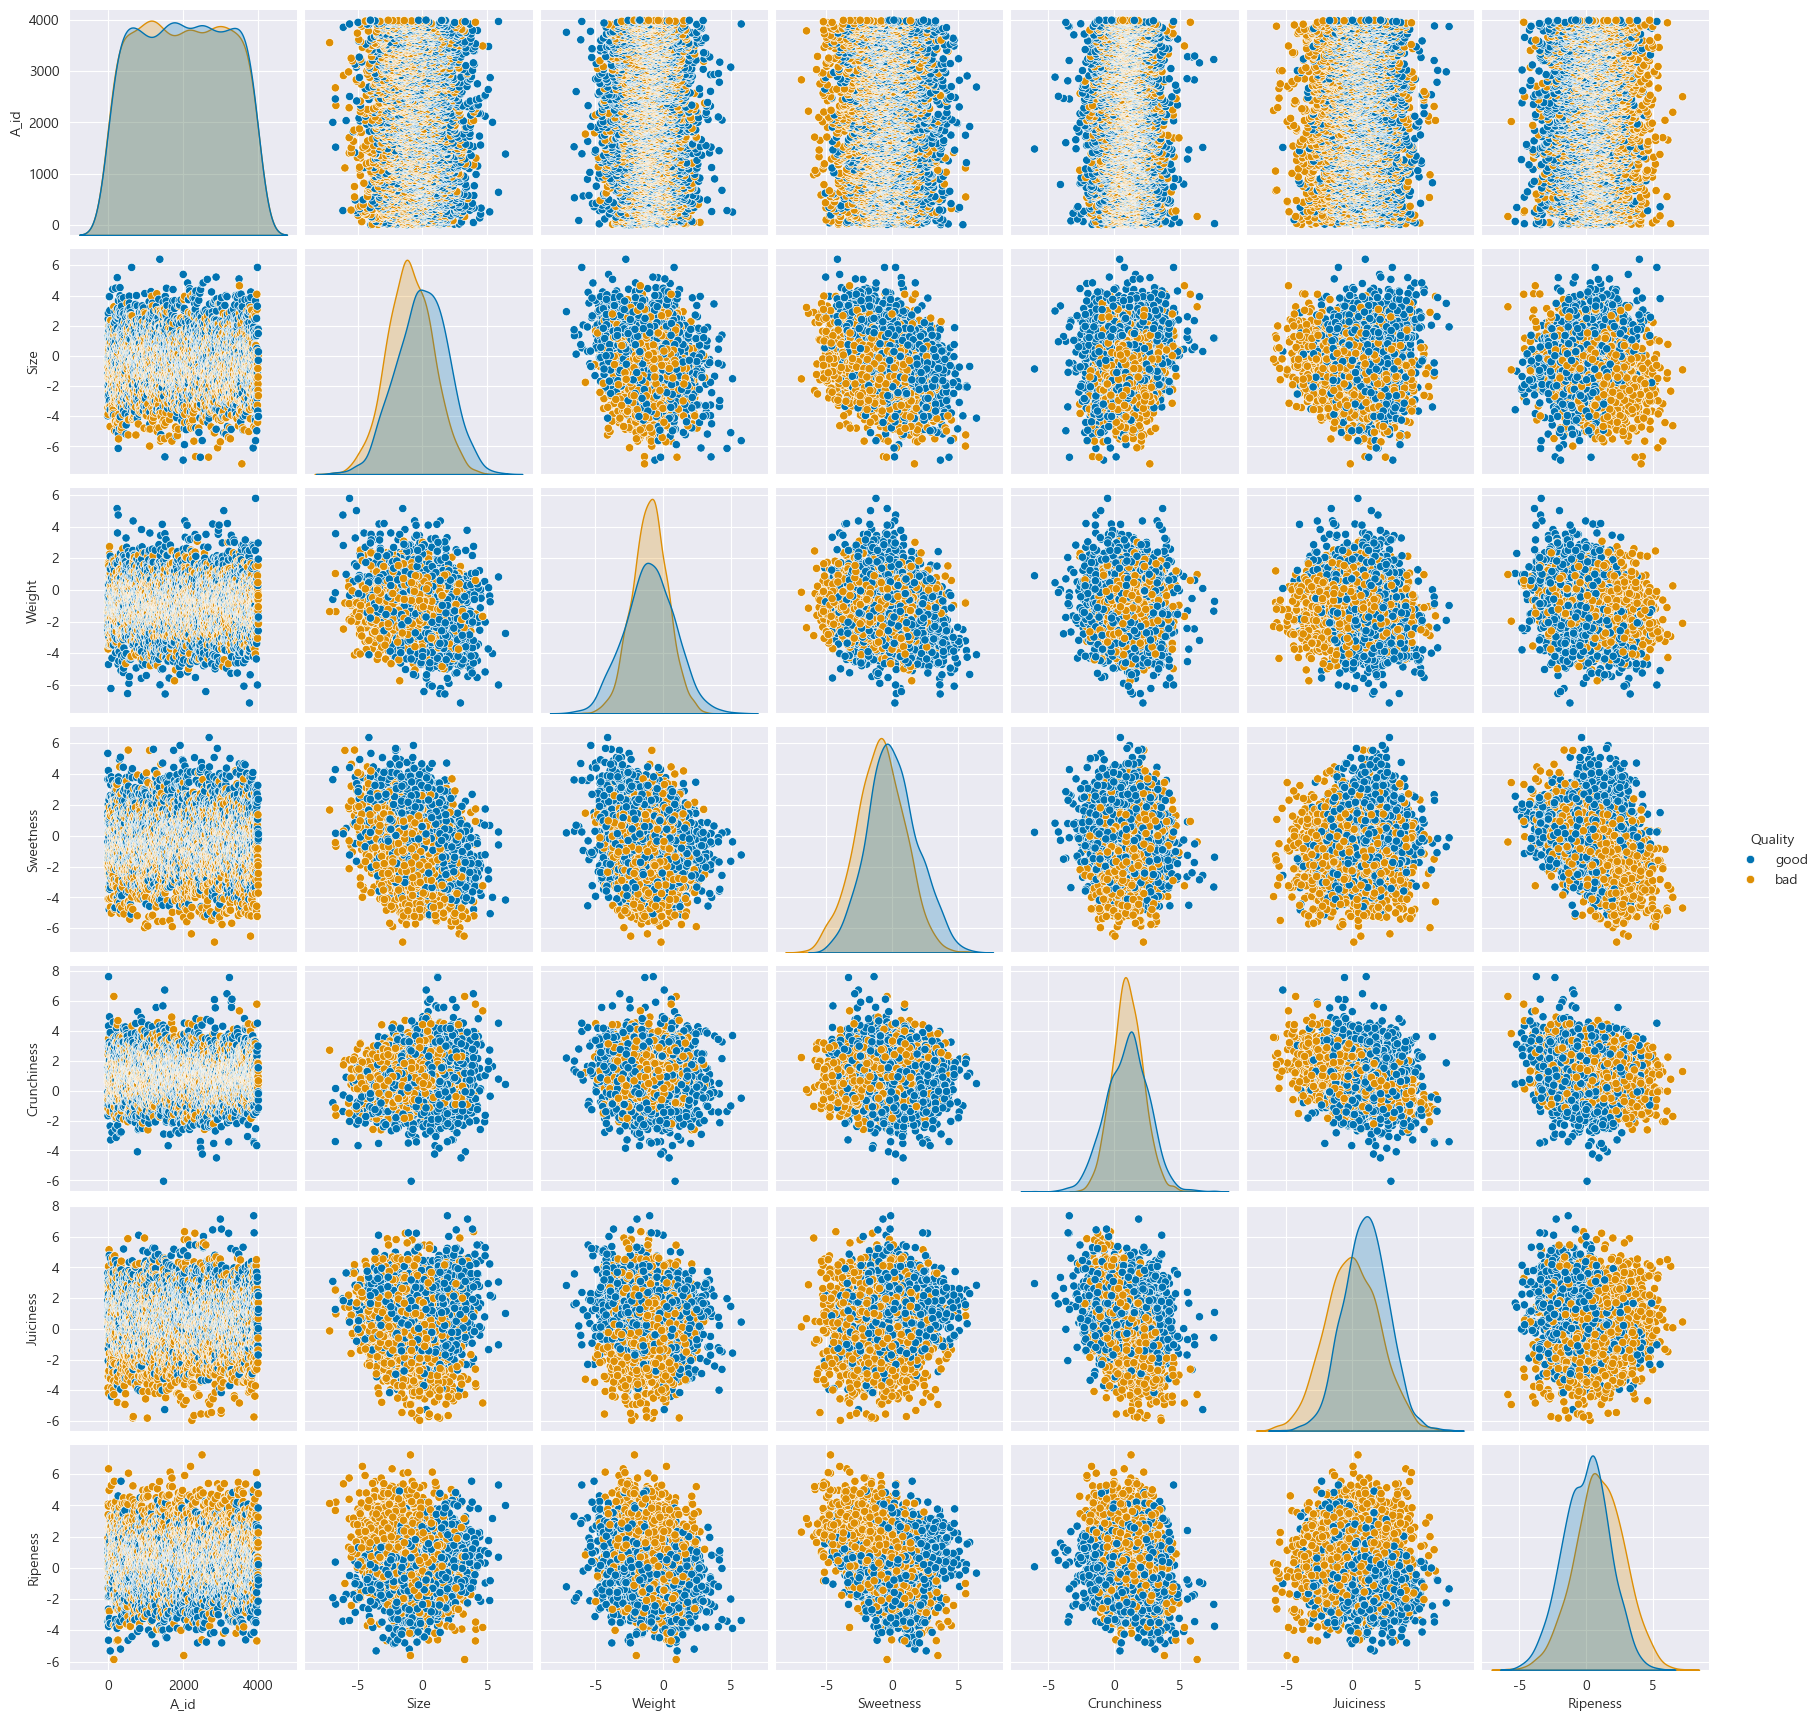

In [31]:
sns.pairplot(data=df, hue='Quality', palette='colorblind')
plt.show()

## 07. 상관관계 및 교차 분석
- 연속형 데이터 : 상관관계
- 범주형 데이터 : 교차표

In [32]:
corr_mat = df.corr(numeric_only=True)
corr_mat

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  \
A_id         1.000000 -0.028911 -0.005730  -0.002378    -0.013111   0.006179   
Size        -0.028911  1.000000 -0.170702  -0.324680     0.169868  -0.018892   
Weight      -0.005730 -0.170702  1.000000  -0.154246    -0.095882  -0.092263   
Sweetness   -0.002378 -0.324680 -0.154246   1.000000    -0.037552   0.095882   
Crunchiness -0.013111  0.169868 -0.095882  -0.037552     1.000000  -0.259607   
Juiciness    0.006179 -0.018892 -0.092263   0.095882    -0.259607   1.000000   
Ripeness     0.000742 -0.134773 -0.243824  -0.273800    -0.201982  -0.097144   

             Ripeness  
A_id         0.000742  
Size        -0.134773  
Weight      -0.243824  
Sweetness   -0.273800  
Crunchiness -0.201982  
Juiciness   -0.097144  
Ripeness     1.000000

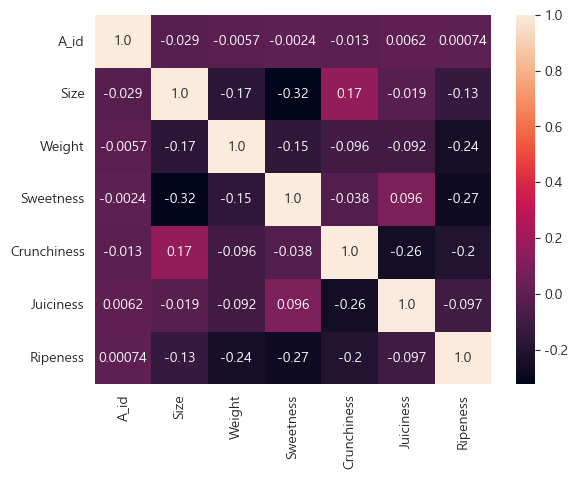

In [36]:
sns.heatmap(corr_mat, annot=True, fmt='.2')
plt.show()

## 08. 데이터 전처리
- 결측치 / 중복값 / 이상치 처리
- 불필요한 컬럼 제거

In [39]:
# 1. A_id drop 하기
# 2. Acidity 하나 더 있는 결측치 빼기
# 3. Acidity의 dtype 이 object 이므로 float64 로 바꾸기 print(df[df.isnull().any(axis=1)])
# 4. Quality 가 target

df = df.drop(['A_id'], axis=1)
df = df[~(df.drop(columns='Acidity').isna().all(axis=1) & df['Acidity'].notna())]
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')
df['Quality_num'] = df['Quality'].map({'bad': 0, 'good': 1})

In [42]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
 8   Quality_num  4000 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 312.5+ KB


Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity  \
0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840 -0.491590   
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530 -0.722809   
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033  2.621636   
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  0.790723   
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849  0.501984   

  Quality  Quality_num  
0    good            1  
1    good            1  
2     bad            0  
3    good            1  
4    good            1

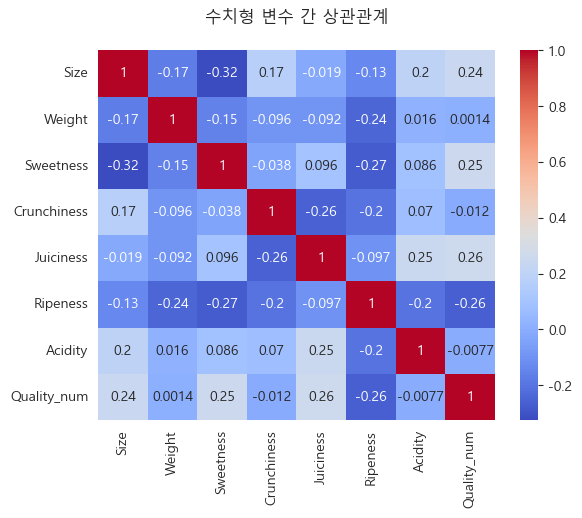

In [44]:
# 다시한번 체크

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('수치형 변수 간 상관관계', pad= 20)
plt.show()

## 09. Feature Engineering
Feature (독립변수, 속성, 열) 가공.
- 새로운 변수 생성
- 그룹핑 처리 가능
- 편향 개선 (로그 함수 처리)
- 스케일링 (범위변경)

In [73]:
# 500개의 샘플링 데이터
from sklearn.model_selection import train_test_split

df_sample, _ = train_test_split(df,
                                train_size=500,
                                stratify=df['Quality'],
                                random_state=42)
df_sample

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
2513 -0.819739  0.293158  -0.518941    -0.219807  -1.076782 -1.118544   
190  -0.433011 -1.473764   1.062339     0.988939   0.219545  2.118381   
17   -0.074370 -4.714750   0.249768     2.935319   1.409755 -2.643810   
3204 -5.405693 -0.055606  -1.057041     0.865469  -0.304585  1.041009   
1679  0.905159 -2.074057  -2.905732     0.260481   1.845435  1.096334   
...        ...       ...        ...          ...        ...       ...   
2987 -5.692093  0.210191   1.907674    -0.838853   2.193989  1.324186   
3312 -2.670178  0.437904   1.783059     0.630391   1.459112 -2.357962   
592   3.200290  0.962163  -0.530071     0.746540  -1.003161  0.450423   
2973 -1.994285  0.085000  -1.037805    -0.722172   0.204846 -1.520302   
3260  1.459970 -0.523290  -2.295516     3.436031  -0.050537 -0.727058   

       Acidity Quality  Quality_num  
2513 -0.041491    good            1  
190   0.924712    good            1  
17    1.250970    good            1  
3204 -2.235373     bad            0  
1679  4.095312     bad            0  
...        ...     ...          ...  
2987 -1.590178     bad            0  
3312  1.802374     bad            0  
592   2.576950    good            1  
2973 -0.194669    good            1  
3260  2.004538    good            1  

[500 rows x 9 columns]

In [74]:
# 더 나은 그래프를 위해 관련된 상관관계가 높은 Size, Sweetness, Juiciness, Ripeness를 범주화화

df_sample['Size_cat'] = pd.qcut(df_sample['Size'], q=3, labels=['작음', '보통', '큼'])
df_sample['Sweetness_cat'] = pd.qcut(df_sample['Sweetness'], q=3, labels=['덜 달다', '보통', '매우 달다'])
df_sample['Juiciness_cat'] = pd.qcut(df_sample['Juiciness'], q=3, labels=['즙이 없다', '보통', '즙이 많다'])
df_sample['Ripeness_cat'] = pd.qcut(df_sample['Ripeness'], q=3, labels=['덜 익음', '보통', '잘 익음'])


In [75]:
df_sample.head()

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
2513 -0.819739  0.293158  -0.518941    -0.219807  -1.076782 -1.118544   
190  -0.433011 -1.473764   1.062339     0.988939   0.219545  2.118381   
17   -0.074370 -4.714750   0.249768     2.935319   1.409755 -2.643810   
3204 -5.405693 -0.055606  -1.057041     0.865469  -0.304585  1.041009   
1679  0.905159 -2.074057  -2.905732     0.260481   1.845435  1.096334   

       Acidity Quality  Quality_num Size_cat Sweetness_cat Juiciness_cat  \
2513 -0.041491    good            1       보통            보통         즙이 없다   
190   0.924712    good            1       보통         매우 달다            보통   
17    1.250970    good            1       보통         매우 달다            보통   
3204 -2.235373     bad            0       작음            보통            보통   
1679  4.095312     bad            0        큼          덜 달다         즙이 많다   

     Ripeness_cat  
2513         덜 익음  
190          잘 익음  
17           덜 익음  
3204           보통  
1679           보통

## 10. 최종 요약 및 인사이트 도출
- 주요 변수 통계 요약
- 변수 간 영향력 확인
- 분석/모델링에 필요한 방향 설정

- size, sweetness, juiciness, ripeness 이 네개가 중요 했음


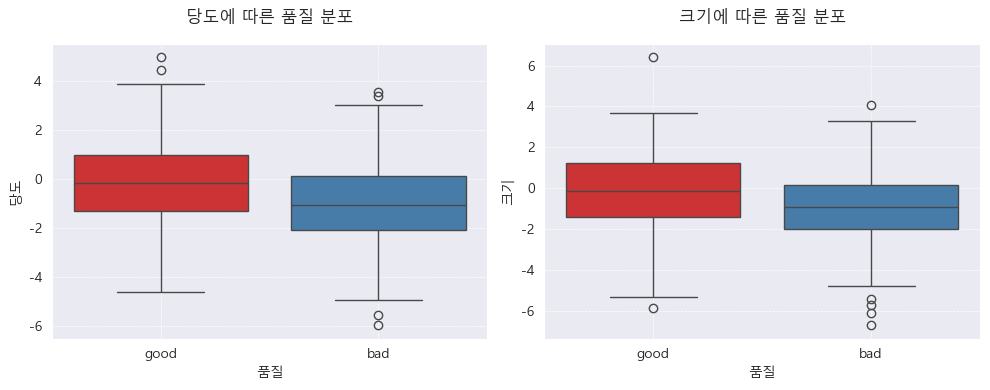

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 1. 당도 vs 품질
sns.boxplot(data=df_sample, x='Quality', y='Sweetness', palette='Set1', hue='Quality', ax=axes[0])
axes[0].set_title('당도에 따른 품질 분포', pad=15)
axes[0].set_xlabel('품질')
axes[0].set_ylabel('당도')
axes[0].grid(True, linestyle='--', linewidth=0.5, zorder=0)

# 2. 크기 vs 품질
sns.boxplot(data=df_sample, x='Quality', y='Size', palette='Set1', hue='Quality', ax=axes[1])
axes[1].set_title('크기에 따른 품질 분포', pad=15)
axes[1].set_xlabel('품질')
axes[1].set_ylabel('크기')
axes[1].grid(True, linestyle='--', linewidth=0.5, zorder=0)

plt.tight_layout()
plt.show()


MemoryError: bad allocation

<Figure size 150000x150000 with 857 Axes>

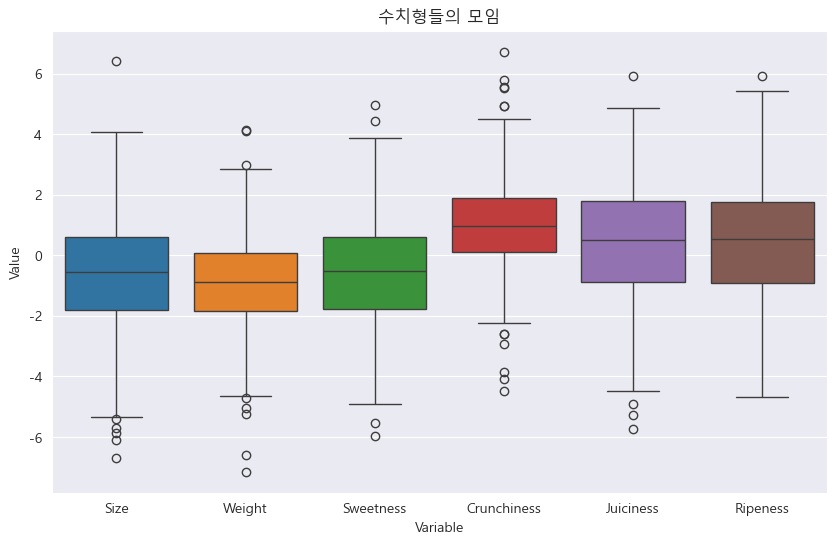

In [125]:
num_cols = ['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sample[num_cols])
plt.title('수치형들의 모임')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

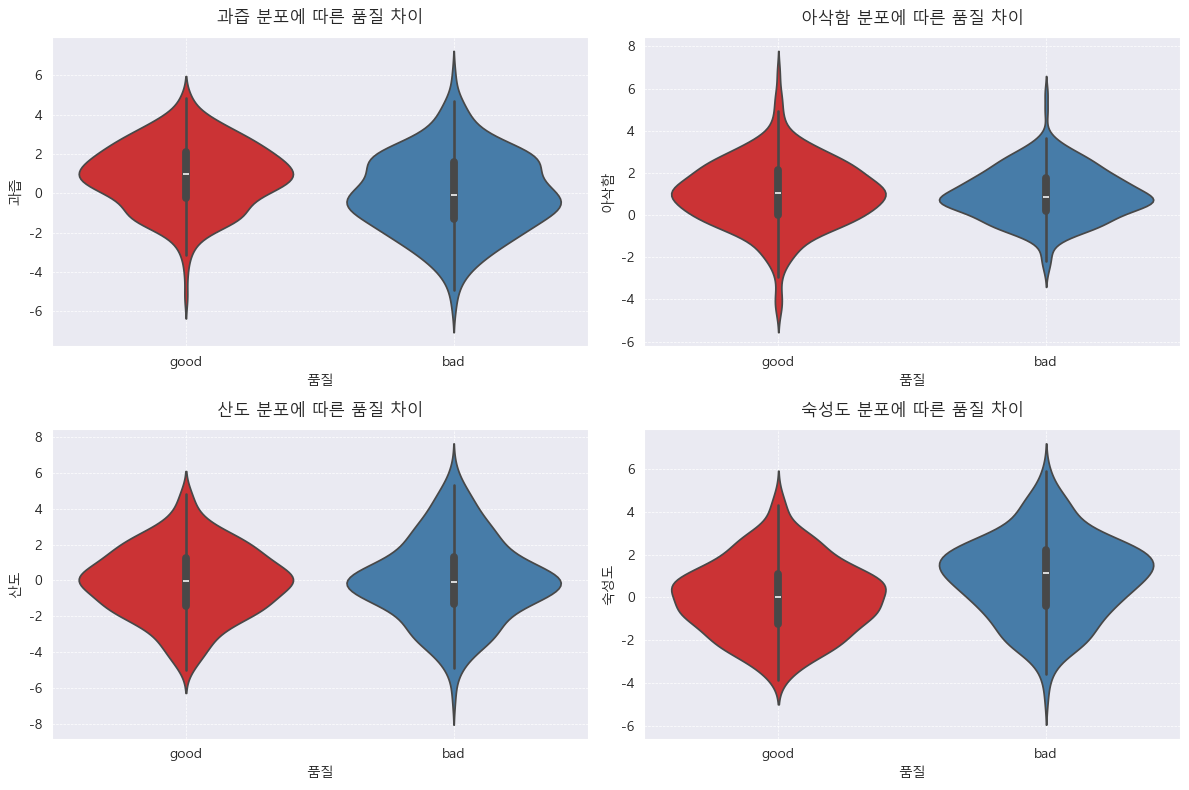

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1. Juiciness vs Quality
sns.violinplot(data=df_sample, x='Quality', y='Juiciness', palette='Set1', hue ='Quality', ax=axes[0, 0])
axes[0, 0].set_title('과즙 분포에 따른 품질 차이', pad=10)
axes[0, 0].set_xlabel('품질')
axes[0, 0].set_ylabel('과즙')
axes[0, 0].grid(True, linestyle='--', linewidth=0.5, zorder=0)

# 2. Crunchiness vs Quality
sns.violinplot(data=df_sample, x='Quality', y='Crunchiness', palette='Set1', hue ='Quality', ax=axes[0, 1])
axes[0, 1].set_title('아삭함 분포에 따른 품질 차이', pad=10)
axes[0, 1].set_xlabel('품질')
axes[0, 1].set_ylabel('아삭함')
axes[0, 1].grid(True, linestyle='--', linewidth=0.5, zorder=0)

# 3. Acidity vs Quality
sns.violinplot(data=df_sample, x='Quality', y='Acidity', palette='Set1', hue ='Quality', ax=axes[1, 0])
axes[1, 0].set_title('산도 분포에 따른 품질 차이', pad=10)
axes[1, 0].set_xlabel('품질')
axes[1, 0].set_ylabel('산도')
axes[1, 0].grid(True, linestyle='--', linewidth=0.5, zorder=0)

# 4. Ripeness vs Quality
sns.violinplot(data=df_sample, x='Quality', y='Ripeness', palette='Set1', hue ='Quality', ax=axes[1, 1])
axes[1, 1].set_title('숙성도 분포에 따른 품질 차이', pad=10)
axes[1, 1].set_xlabel('품질')
axes[1, 1].set_ylabel('숙성도')
axes[1, 1].grid(True, linestyle='--', linewidth=0.5, zorder=0)

plt.tight_layout()
plt.show()

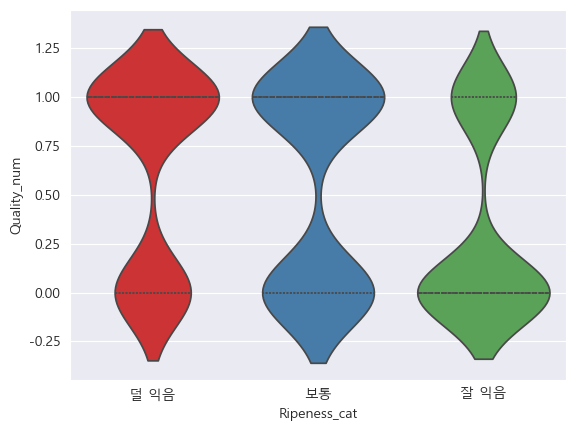

In [86]:
sns.violinplot(data=df_sample, x='Ripeness_cat', y='Quality_num', palette='Set1', hue='Ripeness_cat', inner='quartile')

plt.show()

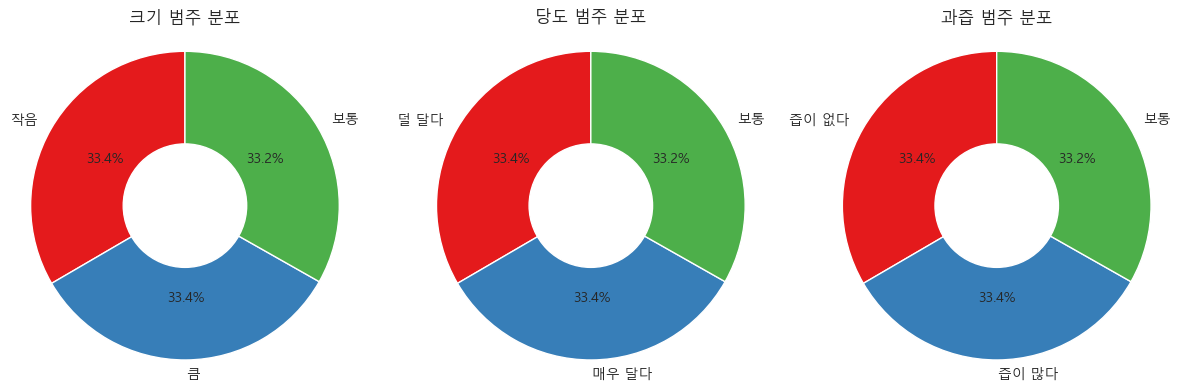

In [109]:
custom_palette = sns.color_palette('Set1')

# 각 범주형 변수별 value_counts
size_counts = df_sample['Size_cat'].value_counts()
sweet_counts = df_sample['Sweetness_cat'].value_counts()
juice_counts = df_sample['Juiciness_cat'].value_counts()

# 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# 1. 크기 범주 분포
wedges1, texts1, autotexts1 = axes[0].pie(
    size_counts,
    labels=size_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
centre_circle1 = plt.Circle((0, 0), 0.40, fc='white')
axes[0].add_artist(centre_circle1)
axes[0].set_title('크기 범주 분포')
axes[0].axis('equal')

# 2. 당도 범주 분포
wedges2, texts2, autotexts2 = axes[1].pie(
    sweet_counts,
    labels=sweet_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
centre_circle2 = plt.Circle((0, 0), 0.40, fc='white')
axes[1].add_artist(centre_circle2)
axes[1].set_title('당도 범주 분포')
axes[1].axis('equal')

# 3. 과즙 범주 분포
wedges3, texts3, autotexts3 = axes[2].pie(
    juice_counts,
    labels=juice_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)
centre_circle3 = plt.Circle((0, 0), 0.40, fc='white')
axes[2].add_artist(centre_circle3)
axes[2].set_title('과즙 범주 분포')
axes[2].axis('equal')

# 레이아웃 정리
plt.tight_layout()
plt.show()


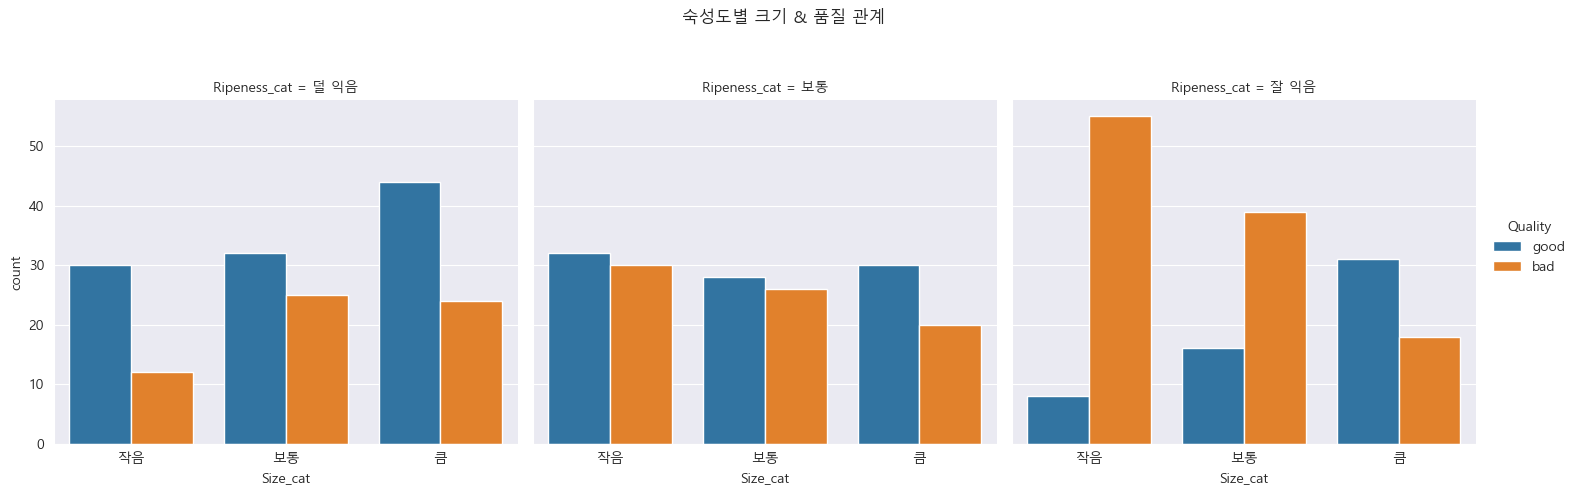

In [117]:
g = sns.catplot(data=df_sample, x='Size_cat', hue='Quality', col='Ripeness_cat', kind='count')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('숙성도별 크기 & 품질 관계')
plt.show()

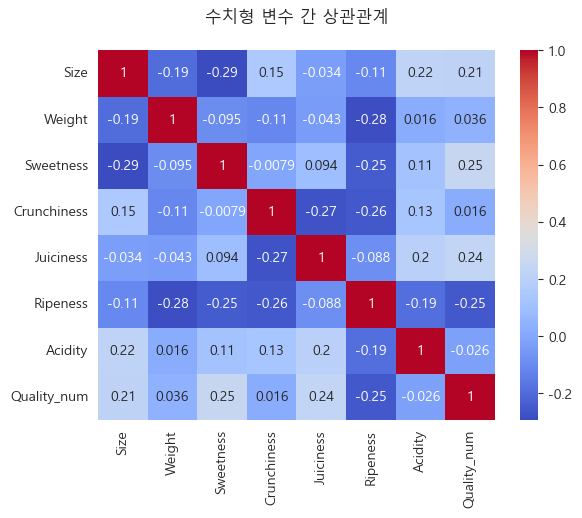

In [118]:
corr = df_sample.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('수치형 변수 간 상관관계', pad= 20)
plt.show()

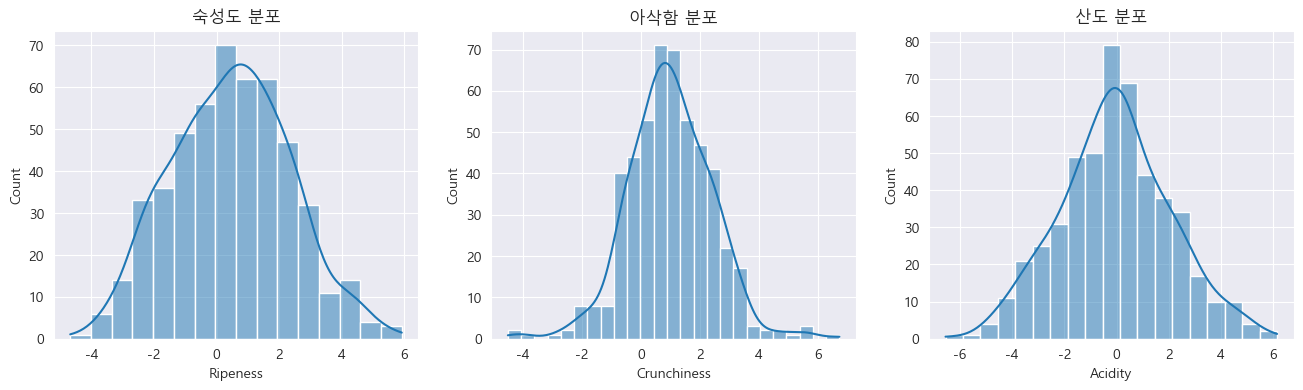

In [146]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

sns.histplot(data=df_sample, x='Ripeness', kde=True, ax=ax[0])
ax[0].set_title('숙성도 분포')

sns.histplot(data=df_sample, x='Crunchiness', kde=True, ax=ax[1])
ax[1].set_title('아삭함 분포')

sns.histplot(data=df_sample, x='Acidity', kde=True, ax=ax[2])
ax[2].set_title('산도 분포')

plt.show()


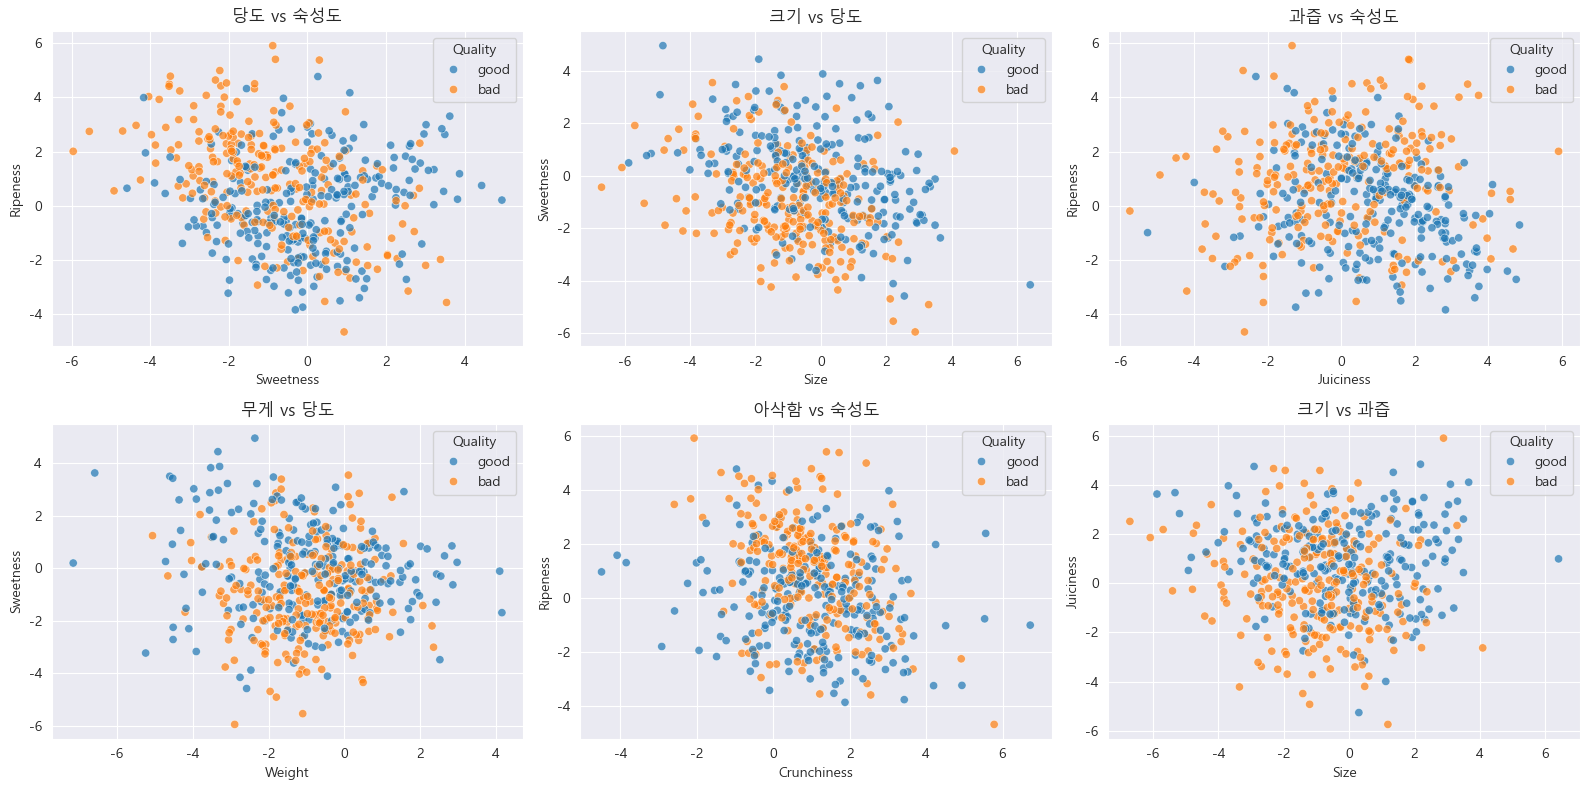

In [149]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))

# (1) 당도 vs 숙성도
sns.scatterplot(data=df_sample, x='Sweetness', y='Ripeness', hue='Quality', alpha=0.7, ax=ax[0, 0])
ax[0, 0].set_title('당도 vs 숙성도')

# (2) 크기 vs 당도
sns.scatterplot(data=df_sample, x='Size', y='Sweetness', hue='Quality', alpha=0.7, ax=ax[0, 1])
ax[0, 1].set_title('크기 vs 당도')

# (3) 과즙 vs 숙성도
sns.scatterplot(data=df_sample, x='Juiciness', y='Ripeness', hue='Quality', alpha=0.7, ax=ax[0, 2])
ax[0, 2].set_title('과즙 vs 숙성도')

# (4) 무게 vs 당도
sns.scatterplot(data=df_sample, x='Weight', y='Sweetness', hue='Quality', alpha=0.7, ax=ax[1, 0])
ax[1, 0].set_title('무게 vs 당도')

# (5) 아삭함 vs 숙성도
sns.scatterplot(data=df_sample, x='Crunchiness', y='Ripeness', hue='Quality', alpha=0.7, ax=ax[1, 1])
ax[1, 1].set_title('아삭함 vs 숙성도')

# (6) 크기 vs 과즙
sns.scatterplot(data=df_sample, x='Size', y='Juiciness', hue='Quality', alpha=0.7, ax=ax[1, 2])
ax[1, 2].set_title('크기 vs 과즙')

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()


# 모델 학습

In [127]:
print(df_sample)

          Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
2513 -0.819739  0.293158  -0.518941    -0.219807  -1.076782 -1.118544   
190  -0.433011 -1.473764   1.062339     0.988939   0.219545  2.118381   
17   -0.074370 -4.714750   0.249768     2.935319   1.409755 -2.643810   
3204 -5.405693 -0.055606  -1.057041     0.865469  -0.304585  1.041009   
1679  0.905159 -2.074057  -2.905732     0.260481   1.845435  1.096334   
...        ...       ...        ...          ...        ...       ...   
2987 -5.692093  0.210191   1.907674    -0.838853   2.193989  1.324186   
3312 -2.670178  0.437904   1.783059     0.630391   1.459112 -2.357962   
592   3.200290  0.962163  -0.530071     0.746540  -1.003161  0.450423   
2973 -1.994285  0.085000  -1.037805    -0.722172   0.204846 -1.520302   
3260  1.459970 -0.523290  -2.295516     3.436031  -0.050537 -0.727058   

       Acidity Quality  Quality_num Size_cat Sweetness_cat Juiciness_cat  \
2513 -0.041491    good            1       보통   

In [129]:
df_sample.drop(columns=['Size_cat', 'Sweetness_cat', 'Juiciness_cat', 'Ripeness_cat'], inplace=True)

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# X, y 설정
X = df_sample.drop(columns=['Quality', 'Quality_num'])
y = df_sample['Quality_num']

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        47
           1       0.83      0.83      0.83        53

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print(f"{name} Accuracy: {acc:.3f}")


Logistic Accuracy: 0.690
DecisionTree Accuracy: 0.740
RandomForest Accuracy: 0.850
GradientBoosting Accuracy: 0.840


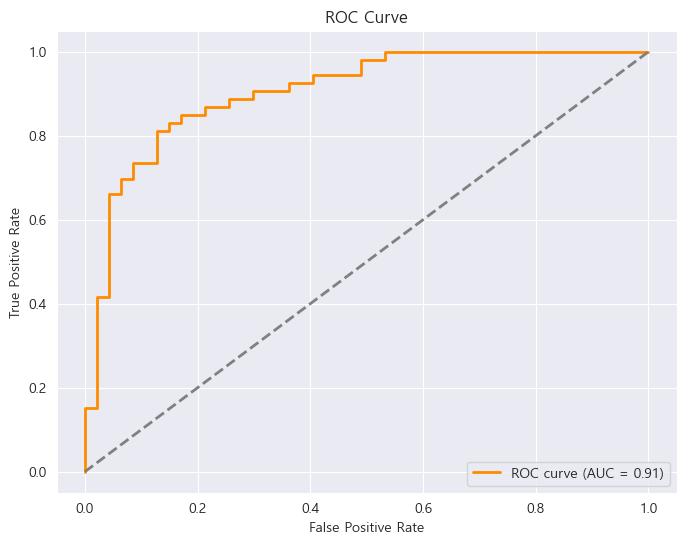

In [165]:
from sklearn.metrics import roc_curve, auc

# 확률 기반 예측
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
